## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number=len(merged_table["Mouse ID"].unique())
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_doubles = merged_table.loc[merged_table.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
mouse_id_doubles

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id_doubles =merged_table.loc[merged_table["Mouse ID"]=="g989"].index
mouse_id_doubles 

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_df = merged_table.drop(mouse_id_doubles)
dropped_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice in the clean DataFrame.
len(dropped_df["Mouse ID"].unique())

## Summary Statistics

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame(dropped_df.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats
summary_stats["Mean"] = pd.DataFrame(dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats["SEM"] = pd.DataFrame(dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_stats["Median"] = pd.DataFrame(dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats["Standard Deviation"] = pd.DataFrame(dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats["Variance"] = pd.DataFrame(dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

#Columns recall for graph
summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summary_stats = summary_stats.rename(columns = {"Mouse ID" : "Trials"})

summary_stats.head(20)

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,148,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Trials, dtype: int64


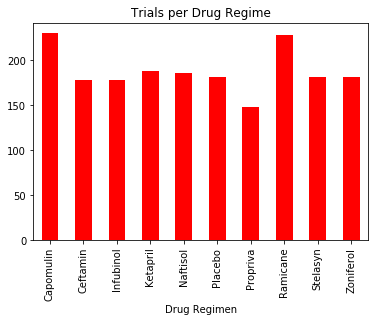

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Filter the DataFrame down only to those columns to chart
data_points = summary_stats["Trials"]
print(data_points)
# Use DataFrame.plot() in order to create a bar chart of the data
data_points.plot(kind="bar", figsize=(6,4), color = "r")

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

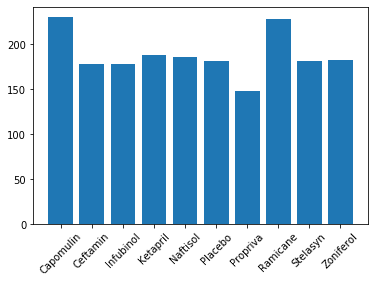

In [127]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Reordered drug names because data is correct
drug_list = ["Capomulin", "Ceftamin", "Infubinol","Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(drug_list, summary_stats["Trials"])
plt.xticks(rotation=45)


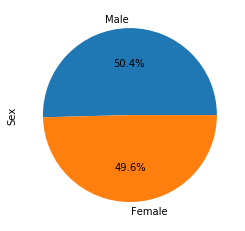

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df= dropped_df.drop_duplicates(["Mouse ID"], keep="first", inplace=False)
gender_df["Sex"].value_counts().plot(kind="pie",autopct="%1.1f%%", startangle=0)

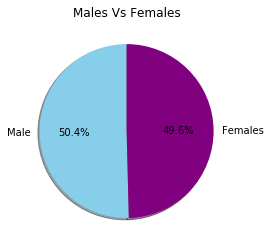

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders=["Male", "Females"]
colors=["skyblue", "purple"]
plt.title("Males Vs Females")
gender_counts=gender_df["Sex"].value_counts()
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_df = dropped_df["Tumor Volume (mm3)"]
regimen_df = tumor_df.loc[(dropped_df["Drug Regimen"]=="Capomlin")|(dropped_df["Drug Regimen"]=="Ramicane")|(dropped_df["Drug Regimen"]=="Ceftamin")|(dropped_df["Drug Regimen"]=="Infubinol")]
print(regimen_df)
unique_mice= dropped_df["Mouse ID"].unique()
len(unique_mice)

0       45.000000
1       38.825898
2       35.014271
3       34.223992
4       32.997729
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 584, dtype: float64


248

In [104]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
combined_drugs_only= dropped_df[dropped_df["Drug Regimen"].isin(four_drugs)]

# View the newly created subset dataframe
combined_drugs_only.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [134]:
# Using a groupby to output
last_tumors = combined_drugs_only.groupby(['Drug Regimen','Mouse ID']).agg(\
# Get the last value of the 'Tumor Volume (mm3)' column 
last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_tumors = last_tumors.stack(level=0).unstack(level=0)
# # View the results
four_tumors.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,last_tumor_size,NaN,NaN,67.973,NaN
a251,last_tumor_size,NaN,NaN,65.526,NaN
a275,last_tumor_size,NaN,62.999,NaN,NaN
a411,last_tumor_size,NaN,NaN,NaN,38.408
a444,last_tumor_size,NaN,NaN,NaN,43.048


In [ ]:
# Do quartile calculations for each drug
counter = 0
for drug in four

In [122]:
# Do quartile calculations for each drug
counter = 0
for drug in four_drugs:
    quartiles = four_tumors[drug].quantile([.25,.5,.75]).round(3)
    lower = quartiles[0.25].round(2)
    upper = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),3)
    
    print(f"{drug}")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
   
    counter += 1

Capomulin
The lower quartile is: 45.0
The upper quartile is: 56.32407510749999
Ramicane
The lower quartile is: 45.0
The upper quartile is: 56.32407510749999
Infubinol
The lower quartile is: 45.0
The upper quartile is: 56.32407510749999
Ceftamin
The lower quartile is: 45.0
The upper quartile is: 56.32407510749999


In [111]:
# Settingup the list to plot it in box plot
plotting_list=[]

for drug in four_drugs:
    plotting_list.append(list(four_tumors[drug].dropna()))

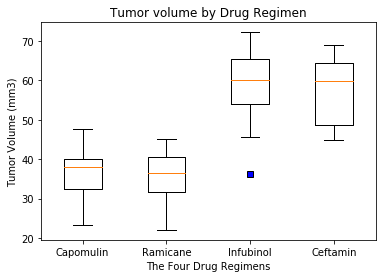

In [112]:
# Box Plot for each drug
marker = dict(markerfacecolor='b', marker='s')
plt.boxplot(plotting_list,flierprops=marker)
plt.xticks([1,2,3,4],four_drugs)
plt.title('Tumor volume by Drug Regimen')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel('The Four Drug Regimens')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, "Mouse 'x401'")

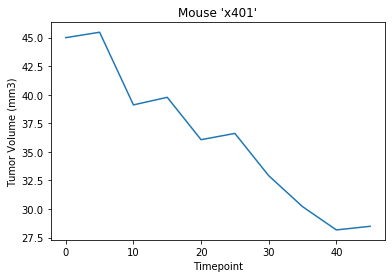

In [113]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = dropped_df.loc[(dropped_df["Drug Regimen"] == "Capomulin"),:]
# capomulin_df.head(20)

x401=dropped_df.loc[dropped_df["Mouse ID"]=="x401"]
plt.plot(x401["Timepoint"],x401["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse 'x401'")


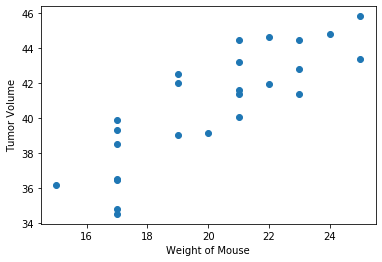

In [114]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#for x and y values
weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
t_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight,t_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between weight and tumor value is 0.84


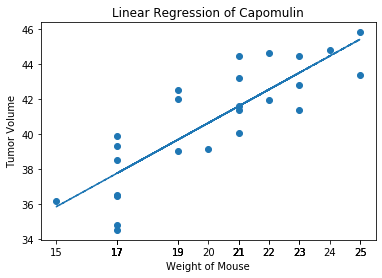

In [117]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Pull values for x and y values
# reusing the scatterplot from above
weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
t_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Correlation coefficient
correlation = round(st.pearsonr(weight,t_volume)[0],2)
print(f'The correlation between weight and tumor value is {correlation}')

# Linear regression 
slope, int, r, p, std_err = st.linregress(weight, t_volume)
      
# Create equation of line 
fit = slope * weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(weight,t_volume)
plt.title("Linear Regression of Capomulin")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(weight,fit,"--")
plt.xticks(weight, rotation=0)
plt.show()
